# <a id="#">Task 2 – Image IO, Histograms, Intensity clipping</a>

In [3]:
import numpy
import matplotlib.pyplot as plt

---

## Image IO

**<a id="#">Task 2.1.</a>** Enter your solution below:

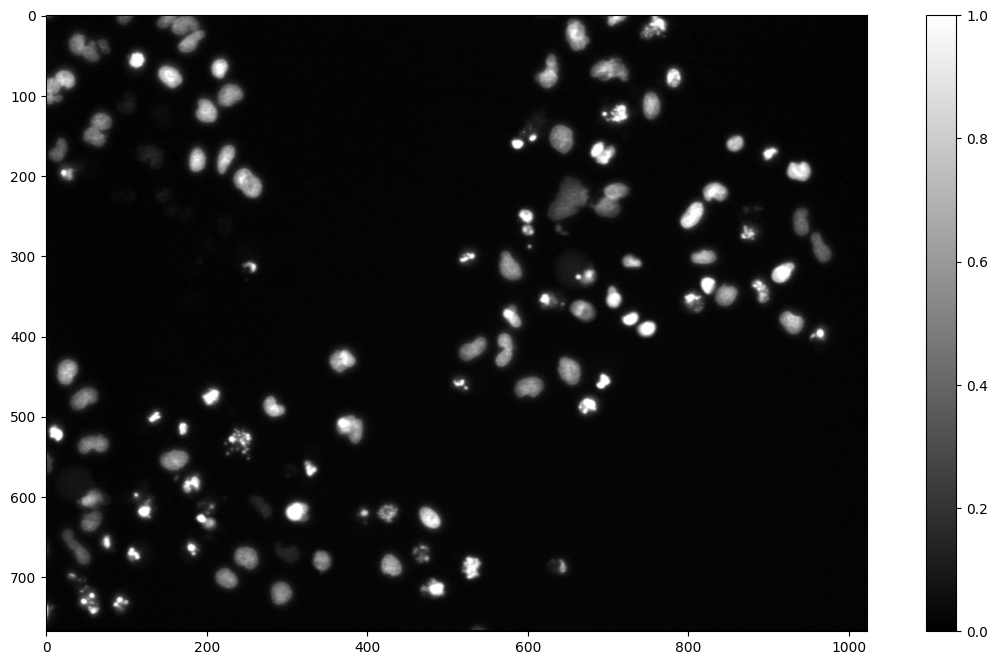

In [4]:
img = plt.imread('data/cells.png')
plt.figure(figsize=(15,8))
plt.imshow(img, 'gray')
plt.colorbar()

---

## Histograms

**<a id="#">Task 2.2.</a>** Enter your solution below:

(array([[768.,   0.,   0., ...,   0.,   0.,   0.],
        [642.,  40.,  33., ...,   4.,   4.,   2.],
        [638.,  49.,  35., ...,   3.,   0.,   0.],
        ...,
        [768.,   0.,   0., ...,   0.,   0.,   0.],
        [768.,   0.,   0., ...,   0.,   0.,   0.],
        [768.,   0.,   0., ...,   0.,   0.,   0.]]),
 array([0.        , 0.1       , 0.2       , 0.30000001, 0.40000001,
        0.5       , 0.60000002, 0.69999999, 0.80000001, 0.89999998,
        1.        ]),
 <a list of 1024 BarContainer objects>)

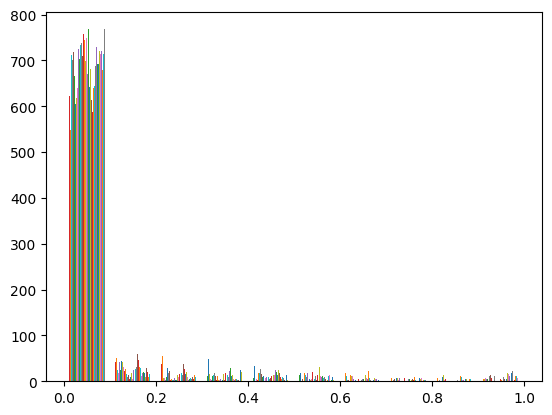

In [5]:
plt.hist(img)

---

## Intensity clipping

First we define some fixed thresholds $T_1$, $T_2$:

In [6]:
T1 = 0.31
T2 = 0.59

### Using `ndarray.clip` method

**<a id="#">Task 2.3.1.</a>** Enter your solution below:

In [7]:
img.clip(T1,T2)

array([[0.31, 0.31, 0.31, ..., 0.31, 0.31, 0.31],
       [0.31, 0.31, 0.31, ..., 0.31, 0.31, 0.31],
       [0.31, 0.31, 0.31, ..., 0.31, 0.31, 0.31],
       ...,
       [0.31, 0.31, 0.31, ..., 0.31, 0.31, 0.31],
       [0.31, 0.31, 0.31, ..., 0.31, 0.31, 0.31],
       [0.31, 0.31, 0.31, ..., 0.31, 0.31, 0.31]], dtype=float32)

### Not using the `ndarray.clip` method

**<a id="#">Task 2.3.2 (a).</a>** Enter your solution below:

In [8]:
img.shape[0]

768

In [9]:
img.shape[1]

1024

In [10]:
img1=img.copy()
p=0
i=0
for p in range(0,img.shape[0]):
    for i in range(0,1024):
        if img[p,i] < T1:
            img1[p,i] = T1
        elif img[p,i] > T2:
            img1[p,i] = T2
        else:
            img[p,i] = img1[p,i]      


#Erkentnisse: range ist immer exklusiv der letzten Zahl, aber die Intensitäten werden sozusagen auch exklusiv angegeben,
#da bei 0 mit p begonnen wird aber die erste Spalte Spalte 1 ist. 
#für for loops muss man nicht p = p+1 schreiben

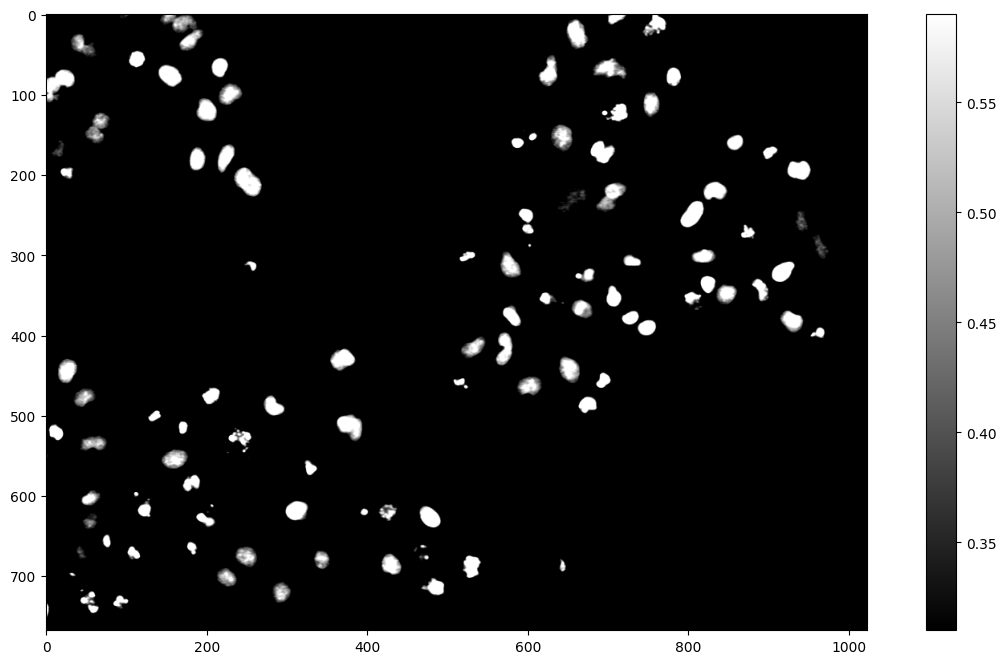

In [11]:
plt.figure(figsize=(15,8))
plt.imshow(img1, 'gray')
plt.colorbar()

**<a id="#">Task 2.3.2 (b).</a>** Enter your solution below:

In [12]:
img2=img.copy()
for j in numpy.ndindex(img.shape):
        if img[j] < T1:
            img2[j] = T1
        elif img[j] > T2:
            img2[j] = T2
        else:
            img[j] = img2[j] 

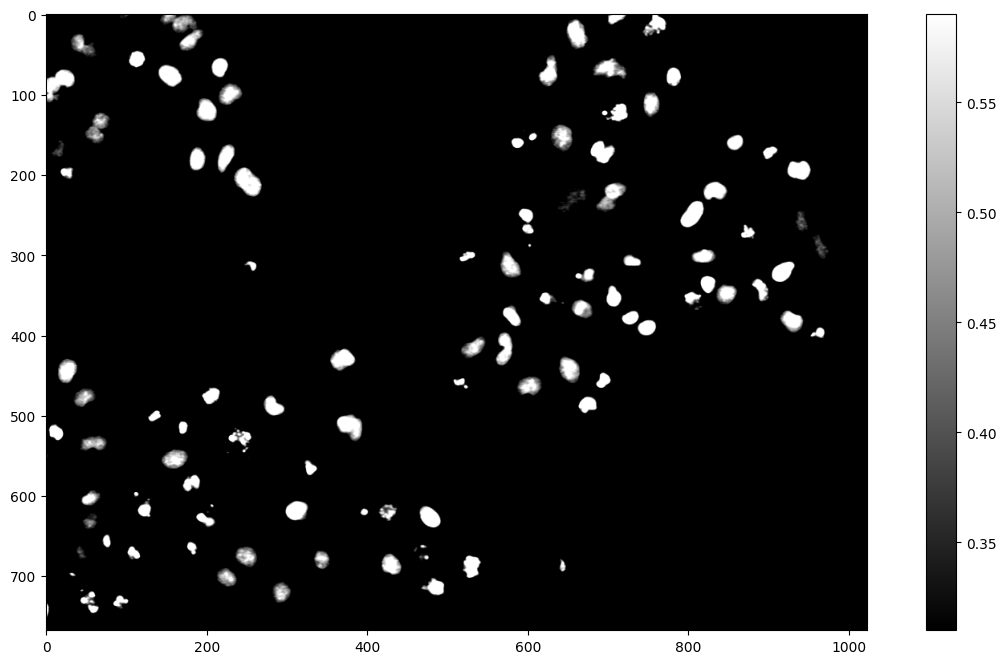

In [13]:
plt.figure(figsize=(15,8))
plt.imshow(img2, 'gray')
plt.colorbar()

---

## Writing re-usable code (bonus)

**<a id="#">Task 2.3.4.</a>** Finish the implementation of the function `clip_image` below, by replacing the comment line (the one which starts with `#`) with your code:

In [18]:
def clip_image(img, T1, T2):
    img1=img.copy()
    p=0
    i=0
    for p in range(0,img.shape[0]):
        for i in range(0,1024):
            if img[p,i] < T1:
                img1[p,i] = T1
            elif img[p,i] > T2:
                img1[p,i] = T2
            else:
                img[p,i] = img1[p,i] 
    return img1

In [19]:
clip_image (img, 0.31,0.59)

array([[0.31, 0.31, 0.31, ..., 0.31, 0.31, 0.31],
       [0.31, 0.31, 0.31, ..., 0.31, 0.31, 0.31],
       [0.31, 0.31, 0.31, ..., 0.31, 0.31, 0.31],
       ...,
       [0.31, 0.31, 0.31, ..., 0.31, 0.31, 0.31],
       [0.31, 0.31, 0.31, ..., 0.31, 0.31, 0.31],
       [0.31, 0.31, 0.31, ..., 0.31, 0.31, 0.31]], dtype=float32)

**Hints:**
1. The implementation of the function starts after the `def`-line. Any instructions written *(i)* below this line and *(ii)* indented to the right will be run *from top to bottom* whenever you use this function. The execution of the function ends when the last instruction is reached or a `return` statement is encountered.
2. The purpose of the function `clip_image` is that it takes an *input* image `img` (along with two thresholds) and returns an *output* image (the clipped image). Make sure that you do *not* change the original input image!

We are going to check that the solution produced by `clip_img` equals the solution `ndarray.clip` produces. If the image you have loaded is not referenced by the variable `img` in your solution for **Task 2.1**, replace `img` by the name of the variable you used to reference the loaded image:

In [20]:
assert (clip_image(img, T1, T2) == img.clip(T1, T2)).all()

Now, we are going to show the clipping results produced using your `clip_image` implementation for different thresholds (`T1`, `T2`). The code below already shows the results for a pair of *two* thresholds. Supplement the code by adding the result for a *third* pair of thresholds!

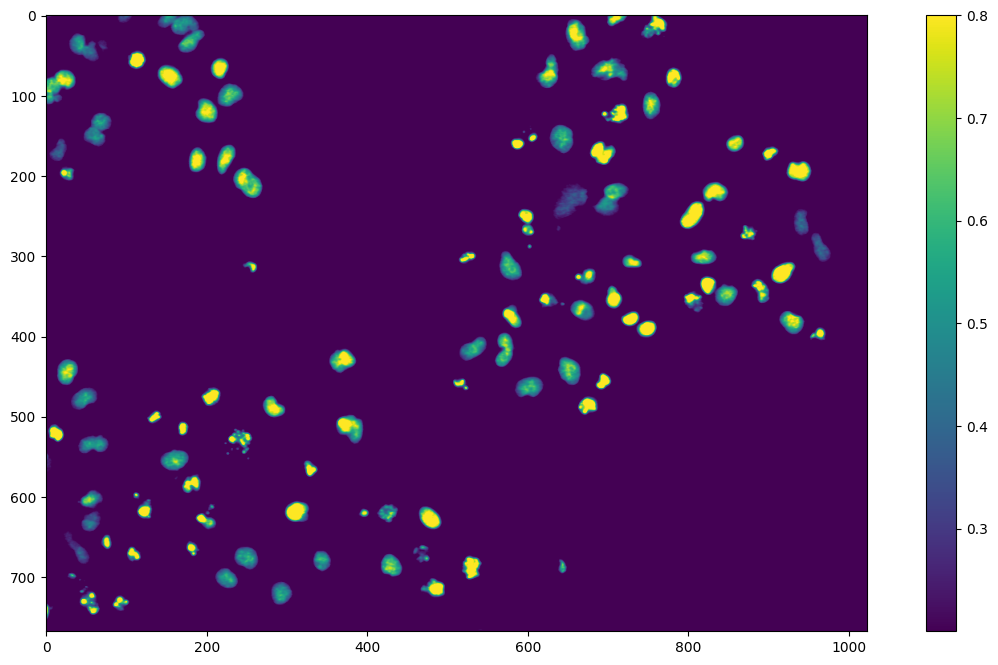

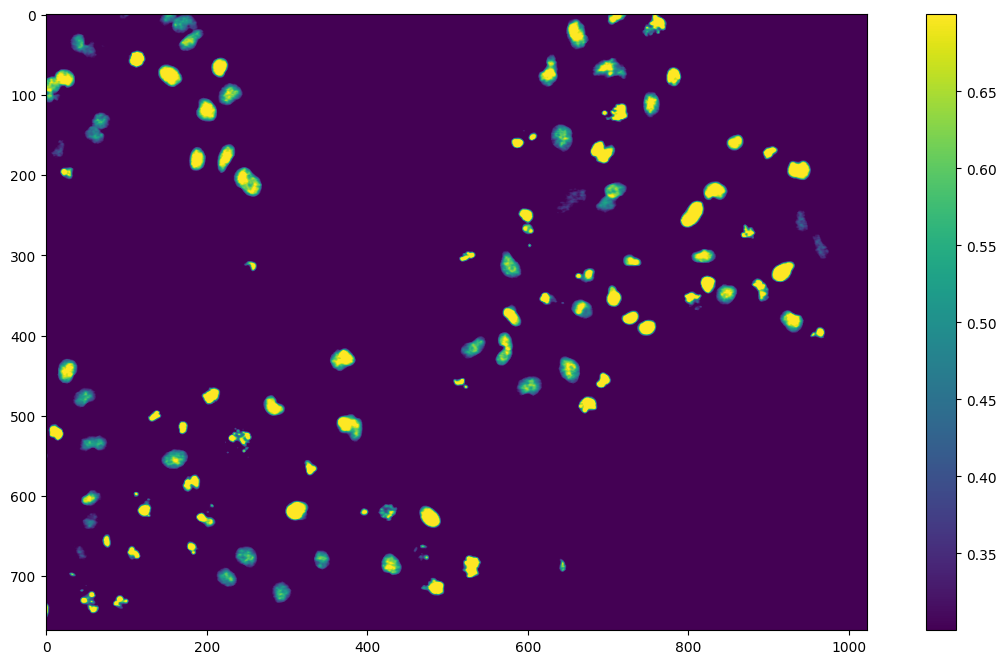

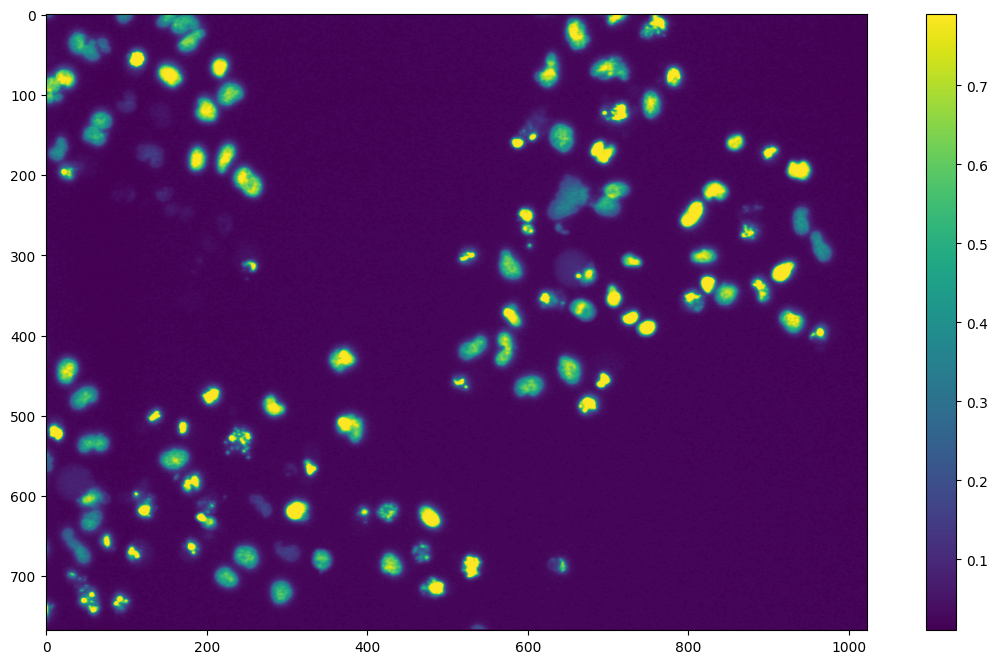

In [24]:
plt.figure(figsize=(15,8))
plt.imshow(clip_image(img, 0.2, 0.8))
plt.colorbar()

plt.figure(figsize=(15,8))
plt.imshow(clip_image(img, 0.3, 0.7))
plt.colorbar()

plt.figure(figsize=(15,8))
plt.imshow(clip_image(img,0.01, 0.79))
plt.colorbar()